In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Different_stores_dataset.csv')
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park


### 1. Check missing values and duplicate records

In [4]:
df.shape

(99457, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


In [6]:
print(df.isnull().sum())

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64


In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99452    False
99453    False
99454    False
99455    False
99456    False
Length: 99457, dtype: bool

In [8]:
df.duplicated().sum()

0

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


### 2. Add column name 'Total Sales'

In [11]:
df['Total Sales'] = df['quantity'] * df['selling_price_per_unit']
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00


### 3. How many customers have age more than 60?

In [13]:
age_morethan_60 = (df['age']>60).sum()
age_morethan_60

17169

### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

In [15]:
df.head(2)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon,7502.00
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet,5401.53


In [16]:
df.customer_id.unique()

array(['C241288', 'C111565', 'C266599', ..., 'C103292', 'C800631',
       'C273973'], dtype=object)

In [17]:
purchase_counts = df['customer_id'].value_counts()
customers_with_multiple_purchases = purchase_counts[purchase_counts > 1]
customers_with_multiple_purchases


Series([], Name: count, dtype: int64)

### 5. Are there more male or female customers, Show in Pie Chart?

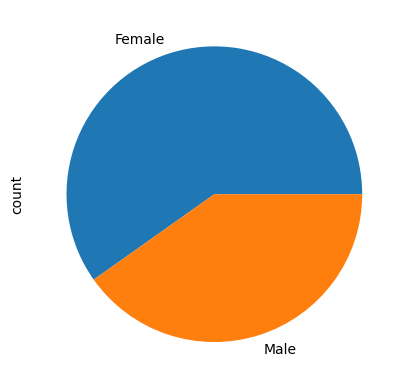

In [19]:
df.gender.value_counts().plot(kind='pie')
plt.show()

### 6. Which category is least popular among customers?

In [21]:
df['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [22]:
least_popular_category = df['category'].value_counts().idxmin()
least_popular_category_counts = df['category'].value_counts().min()
print(f'Least Popular Category : {least_popular_category} {least_popular_category_counts}')

Least Popular Category : Books 4981


### 7. Which category has the highest sales volume?

In [24]:
highest_sale_category = df['category'].value_counts().idxmax()
highest_sale_volume = df['category'].value_counts().max()
print(f'Highest Sale Category : {highest_sale_category} {highest_sale_volume}')

Highest Sale Category : Clothing 34487


### 8. Add column name 'Total Profit'

Total Profit=Total Sales−Total Costs

In [26]:
df['Total Profit'] = (df['quantity']*df['selling_price_per_unit']) - (df['quantity']*df['cost_price_per_unit'])
df['Total Profit'].round(2)

0         375.10
1         540.15
2           5.02
3         500.43
4          60.60
          ...   
99452      73.31
99453       6.28
99454       6.28
99455    1680.00
99456      31.67
Name: Total Profit, Length: 99457, dtype: float64

### 9. Display the top 10 invoices with the highest quantities sold?

In [28]:
df.sort_values(by='quantity', ascending=False).head(10)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.500,Credit Card,Central,Illinois,Viaport Outlet,47250.00,7087.500
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.924,Cash,West,Idaho,Istinye Park,975.84,52.752
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.112,Credit Card,Central,Illinois,Istinye Park,1951.68,390.336
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.060,Cash,Central,Michigan,Kanyon,3300.88,165.220
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.180,Cash,West,Oregon,Mall of Istanbul,9002.40,2250.600
61,I207205,10/30/2016 10:12,C716161,Female,33,Clothing,10,300.08,225.060,Debit Card,East,New York,Kanyon,3000.80,750.200
224,I353272,10/30/2016 10:50,C199311,Female,34,Clothing,10,300.08,292.060,Credit Card,East,Ohio,Istinye Park,3000.80,80.200
201,I286193,10/30/2016 10:45,C322994,Male,37,Cosmetics,9,121.98,118.485,Cash,West,Colorado,Istinye Park,1097.82,31.455
145,I246375,10/30/2016 10:32,C236365,Female,67,Cosmetics,8,81.32,56.924,Cash,West,Oregon,Kanyon,650.56,195.168
11,I139207,10/30/2016 10:00,C191708,Female,29,Books,8,15.15,15.105,Credit Card,West,Idaho,Zorlu Center,121.20,0.360


### 10. Which payment method is most commonly used?

In [30]:
print(df['payment_method'].value_counts())

df2 = df['payment_method'].value_counts().idxmax()
print(f'Most commonly used payment method : {df2}')

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64
Most commonly used payment method : Cash


### 11. Total Sales with respect to region?

In [32]:
print("Total Sales with respect to regions")
df.groupby('region')['Total Sales'].sum()


Total Sales with respect to regions


region
Central    58803471.74
East       72280660.57
South      40655491.64
West       79825624.03
Name: Total Sales, dtype: float64

### 12. Sort Malls with average sales higher to lower?

In [34]:
average_sales_by_mall = df.groupby('shopping_mall')['Total Sales'].mean().round(2).sort_values(ascending=False)
average_sales_by_mall

shopping_mall
Zorlu Center        2573.25
Kanyon              2550.62
Mall of Istanbul    2543.28
Viaport Outlet      2523.84
Istinye Park        2523.19
Metropol AVM        2497.78
Metrocity           2485.03
Name: Total Sales, dtype: float64

### 13. Sort categories with the highest profit margins display in bar plot?

Profit Margin=(Total Sales/Total Profit)×100

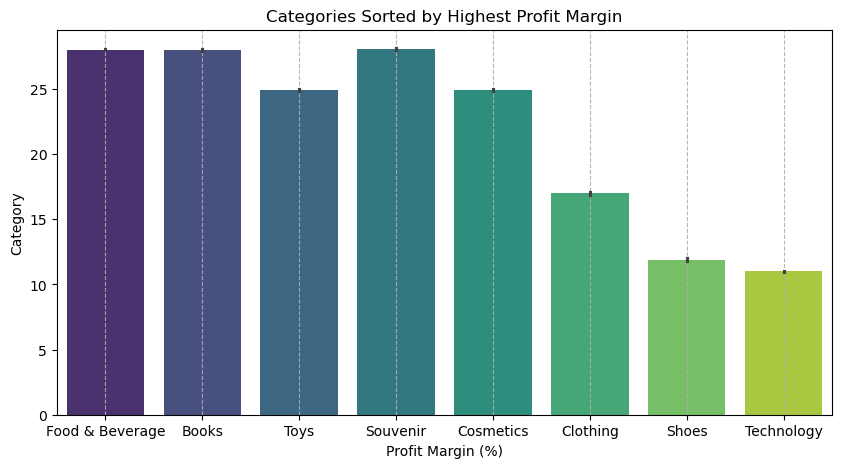

In [36]:
df['Total_Profit'] = (df['quantity']*df['selling_price_per_unit']) - (df['quantity']*df['cost_price_per_unit'])
df['profit_margin'] = (df['Total_Profit'] / df['Total Sales'])*100

sorted_highest_profit_margin = df.sort_values('profit_margin',ascending=False)
sorted_highest_profit_margin

plt.figure(figsize=(10, 5))
sns.barplot(x='category', y='profit_margin', data=sorted_highest_profit_margin, palette='viridis')

plt.xlabel('Profit Margin (%)')
plt.ylabel('Category')
plt.title('Categories Sorted by Highest Profit Margin')
plt.grid(axis='x', linestyle='--', alpha=0.9)

# Show Plot
plt.show()


### 14.  What is the total number of transactions per region for each payment method?

In [38]:
transactions_by_region_payment = df.groupby(['region', 'payment_method']).size().unstack()

print("Total Transactions Per Region for Each Payment Method:")
print(transactions_by_region_payment)

Total Transactions Per Region for Each Payment Method:
payment_method   Cash  Credit Card  Debit Card
region                                        
Central         10319         8140        4640
East            12738         9817        5751
South            7227         5698        3284
West            14163        11276        6404


In [39]:
transactions_by_region_payment = df.groupby(['region', 'payment_method']).size().unstack()

print("Total Transactions Per Region for Each Payment Method:")
print(transactions_by_region_payment)

Total Transactions Per Region for Each Payment Method:
payment_method   Cash  Credit Card  Debit Card
region                                        
Central         10319         8140        4640
East            12738         9817        5751
South            7227         5698        3284
West            14163        11276        6404


### 15. How do sales in different categories compare between males and females?

In [41]:
sales_comparison = df.groupby(['category', 'gender'])['Total Sales'].sum().unstack()

# Display the result
print(sales_comparison)

gender                Female         Male
category                                 
Books              489420.75    345238.20
Clothing         68260097.84  45754397.92
Cosmetics         4068073.66   2728611.28
Food & Beverage    505322.60    344233.37
Shoes            39425167.30  27128284.17
Souvenir           382867.20    252957.45
Technology       34669950.00  23230200.00
Toys              2416046.08   1564380.16
